# SDA - lecture 13 - Clustering

In [1]:
import logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(asctime)s: %(message)s')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# Sklearn clustering algorithms:
## (1) Hierarchical
**author: Yuval Samoilov-Katz


    Weasley  Voldemort     Snape  Rite Skeeter     Rufus  Dumbeldore  \
0  0.523194   0.031111  0.659595      0.522387  0.504441    0.396402   
1  1.024770   0.593084  1.015874      0.095575  0.606295    0.078344   
2  0.768488   0.579684  0.606284      0.464271  0.952365    0.696005   
3  0.642725   1.144491  0.653050      0.098514  0.439611    1.021021   
4  0.351628   0.628880  0.427949      0.054815  1.179784    0.529626   

      Harry  Hermione    Filius  Fletcher   Dursley    Crouch    Crabbe  \
0  0.245578  0.743125  0.359586  0.320193  0.745361  0.634971  0.161496   
1  0.513747  0.115837  0.152592  0.716094  0.271214  0.128335  0.264367   
2  0.194758  0.840903  1.157461  0.600010  1.067424  0.409936  0.680573   
3  0.487530  0.032643  0.296613  0.080573  1.192622  1.164696  0.960310   
4  0.604801  0.388250  0.311694  0.464268  0.998420  0.884096  0.455053   

        Cho     Black    Abbott  
0  0.616294  0.221328  0.942402  
1  0.419792  0.561345  0.242092  
2  0.513055  0

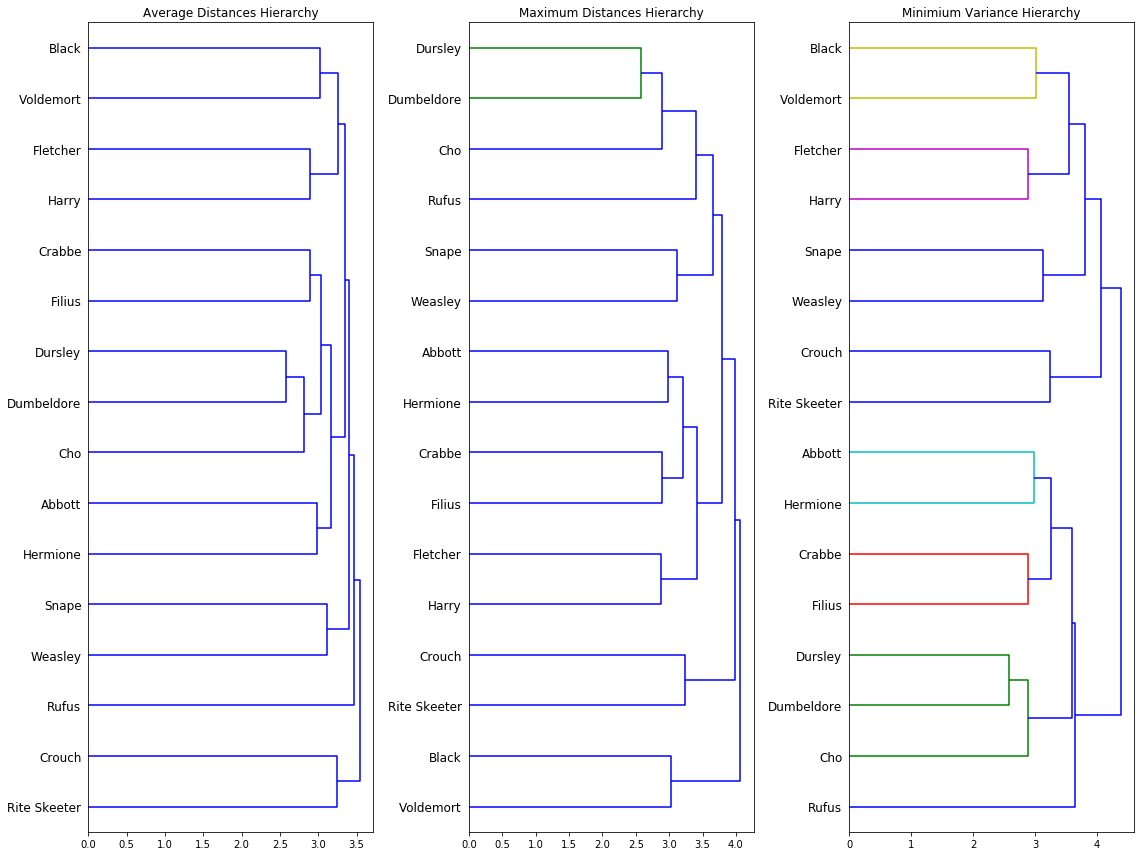

In [2]:
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

#Agglomerative Hierarchical clustering differs using different methods
np.random.seed(2)

# 50 tests with 20% factor due to a COVID-20 virus from dementor's kiss
X = np.random.random((50, 16))*1.2
Students = ['Weasley', 'Voldemort','Snape','Rite Skeeter',
              'Rufus','Dumbeldore','Harry','Hermione',
              'Filius','Fletcher','Dursley','Crouch',
              'Crabbe','Cho','Black','Abbott']

df = pd.DataFrame(data=X, columns=Students)
print(df.head())
## Hierarchical analysis
fig, axes = plt.subplots(figsize=(16,12), nrows=1, ncols=3)

methods = ['average','complete','ward']
exp = ['Average Distances','Maximum Distances','Minimium Variance']
for i,m in enumerate(methods):
    ### visualize dendogram
    dend1 = shc.dendrogram(shc.linkage(X.T, method=m),labels=Students , orientation='right',ax=axes[i])
    axes[i].title.set_text(f'{exp[i]} Hierarchy')
axes[1].set_title(f'{exp[1]} Hierarchy')
plt.tight_layout()
plt.show()

## (2) Kmeans    

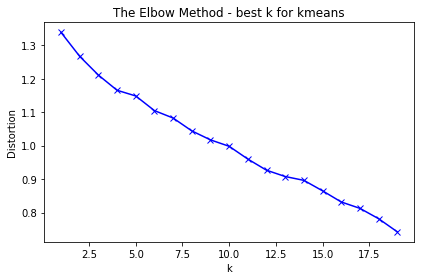

In [3]:
# Exploring KMeans Clustering
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])                   

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method - best k for kmeans')

plt.tight_layout()
plt.show()

## (3) DBSCAN - Noise??

**credit to sklearn demo + few adjustmenrs for exploring epsilons

eplsilon:0.1
Estimated number of clusters: 12
Estimated number of noise points: 516
Homogeneity: 0.313


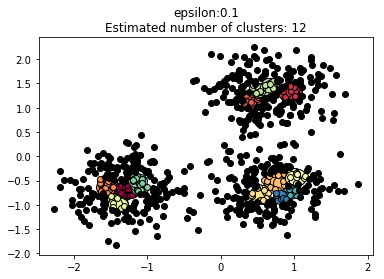

eplsilon:0.2
Estimated number of clusters: 3
Estimated number of noise points: 91
Homogeneity: 0.880


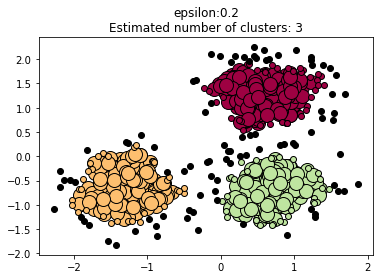

eplsilon:0.3
Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953


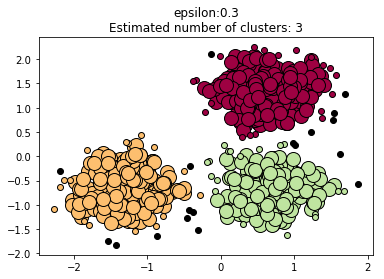

In [4]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

epes = [.1,.2,.3]

for e in epes: 
    #fit the model
    db = DBSCAN(eps=e, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print(f'eplsilon:{e}')
    print(f'Estimated number of clusters: {n_clusters_}')
    print(f'Estimated number of noise points: {n_noise_}')
    print("Homogeneity: {:.3f}".format(metrics.homogeneity_score(labels_true, labels)))

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title(f'epsilon:{e}\nEstimated number of clusters: {n_clusters_}')
    plt.show()